<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####

df = pd.read_csv("./data/job_listings.csv")
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


### Iterating over the ['description'] column with BeautifulSoup to clean out html stuff

In [4]:
d = []
for text in df['description']:
    soup = BeautifulSoup(text, 'html.parser')
    d.append(soup.get_text())
df['description'] = d
df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [5]:
##### Your Code Here #####

nlp = spacy.load('en_core_web_lg')

### doing the same thing, iterating over the cleaned text in df['description'].

#### however i will create a new column for lemmas after using spacy to tokenize the documents from df['description']. stop words and punctuation are removed and the rest are lemmatized to create the new column 

In [21]:
lemma = []
for tx in df['description']:
    doc = nlp(tx)
    lemma.append([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])
df['lemma'] = lemma
df.head()

,Unnamed: 0,description,title,lemma
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, requirements:\nconceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, description\n\na, Data, scientist, 1, ..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, Data, scientist, work, consult, busines..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location, USA, \xe2\x80\x93, multiple, loca..."


#### below shows the columns side by side

In [59]:
print(type(df[['description', 'lemma']]))
print(df['lemma'][301][0:5])
df[['description', 'lemma']].head(3)

<class 'pandas.core.frame.DataFrame'>
['b"Facebook', 'mission', 'people', 'power', 'build']


,description,lemma
0,"b""Job Requirements:\nConceptual understanding ...","[b""Job, requirements:\nconceptual, understandi..."
1,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'Job, description\n\na, Data, scientist, 1, ..."
2,b'As a Data Scientist you will be working on c...,"[b'As, Data, scientist, work, consult, busines..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [58]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
### below, I'm instantiating the CountVectorizer class with a 1000 mox_features to reduce noise

In [ ]:
vect = CountVectorizer(stop_words='english', max_features=1000) # why limit to just 1000
## this reduces the noise from 0 values

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [75]:
docs = df['description']
vect = CountVectorizer(stop_words='english', max_features=1000)
vect.fit(docs)
dtm = vect.transform(docs)

dtm2 = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())


### word counts

In [78]:
print(dtm)

  (0, 6)	1
  (0, 129)	1
  (0, 140)	1
  (0, 154)	1
  (0, 170)	1
  (0, 207)	1
  (0, 212)	1
  (0, 218)	1
  (0, 278)	1
  (0, 319)	2
  (0, 326)	1
  (0, 345)	1
  (0, 348)	1
  (0, 367)	1
  (0, 392)	1
  (0, 401)	1
  (0, 453)	1
  (0, 460)	1
  (0, 473)	1
  (0, 476)	1
  (0, 483)	2
  (0, 486)	1
  (0, 498)	1
  (0, 517)	1
  (0, 521)	1
  :	:
  (425, 892)	1
  (425, 894)	1
  (425, 898)	1
  (425, 902)	3
  (425, 903)	1
  (425, 904)	1
  (425, 916)	1
  (425, 917)	1
  (425, 920)	1
  (425, 923)	1
  (425, 928)	1
  (425, 932)	1
  (425, 935)	1
  (425, 936)	1
  (425, 944)	2
  (425, 948)	1
  (425, 953)	1
  (425, 968)	6
  (425, 970)	1
  (425, 971)	1
  (425, 978)	5
  (425, 980)	2
  (425, 986)	3
  (425, 995)	5
  (425, 998)	2


### word counts in matrix form

In [79]:
dtm2.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## 4) Visualize the most common word counts

In [85]:
##### Your Code Here #####
dtm2.sum().sort_values(ascending=False)[:1]

data    4394
dtype: int64

## use the line from above to create an sns distribution plot below

<AxesSubplot:>

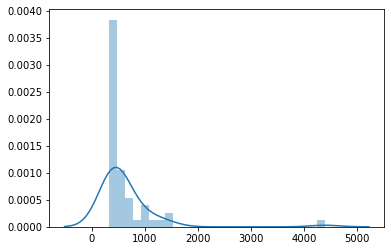

In [92]:
import seaborn as sns

sns.distplot(dtm2.sum().sort_values(ascending=False)[:50])

### based on the graph above you should consider appending 'data' to the stop words list

### whats the length of each document?

In [86]:
doc_len = [len(doc) for doc in docs]

In [89]:
doc_len[:5]

[837, 4011, 856, 1740, 237]

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [93]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

### Now we'll instantiate the tfidfVectorizer() class and use it to transform the docs variable to a TF-IDF feature matrix.

In [94]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(docs)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
def tokenize(document):
    """tokenizes and lemmatizes"""
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]


### below, analyzes unique topics for each document

In [199]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=.05,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['description']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,+,+ year,1,10,100,2,2019,3,3 year,...,write communication,write verbal,year,year experience,year professional,year relevant,year work,years\xe2\x80\x99,york,you\xe2\x80\x99ll
0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.150387,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.041867,0.045716,0.15787,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.030044,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.265893,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.038032,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.227397,0.248300,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.163181,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
dtm.shape

(426, 1051)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [201]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [204]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.21251101, 1.2148629 , 1.22450202, 1.22539118]]),
 array([[  0, 403,  79, 345, 338]], dtype=int64))

In [205]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[77]])

(array([[0.        , 0.        , 0.84131856, 1.18311206, 1.18311206]]),
 array([[ 77, 214,  89, 181,  11]], dtype=int64))

In [206]:
docs[256][:200]

"b'Role Summary:\\nThe CCS Data Scientist is responsible for supporting the CCS digital service operations teams with data analytics that drive improved remote service efficiency and improved customer e"

### what shall my job description be???

In [207]:
job_description = ["""
65000 junior entry data science data analyst biology agriculture denver boulder fort collins remote 401k health benefits bachelor's degree
"""]

In [208]:
new = tfidf.transform(job_description)

In [209]:
new

<1x1051 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [210]:
nn.kneighbors(new.todense())

(array([[1.15920688, 1.22271234, 1.27076096, 1.28523077, 1.28665185]]),
 array([[213, 406, 349, 201, 391]], dtype=int64))

## MY BEST MATCH, I guess I'm moving to Houston

In [215]:
df['description'][213]

"b'Houston Methodist (HM) is looking for passionate data scientists to join the Center for Outcomes Research (COR) to lead and develop informatics initiatives that transform healthcare via data science and informatics. The goal of the HM COR informatics initiative is to benefit patients and society as a whole by utilizing the skills and tools of data science to model patient populations clinically and economically within the context of the patient, the health care and hospital systems so that we can optimize business and clinical operations, improve patient care, reduce costs and position HM to more effectively address population health and other strategic health care needs into the future. The responsibility of the data scientist is to address the best uses of data science and informatics resources for HM clinical and business operations and patient care, including the organization\\xe2\\x80\\x99s needs to assess and understand clinical, financial, operational, population health and m

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 